# 1. install and import

In [ ]:
# Install Essential Libraries
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

#2. Dataset

In [ ]:
train_images = '/content/drive/MyDrive/DL/train/images'
val_images = '/content/drive/MyDrive/DL/valid/images'
test_images = '/content/drive/MyDrive/DL/test/images'
train_labels = '/content/drive/MyDrive/DL/train/labels'
val_labels = '/content/drive/MyDrive/DL/valid/labels'
test_labels = '/content/drive/My Drive/DL/test/labels'

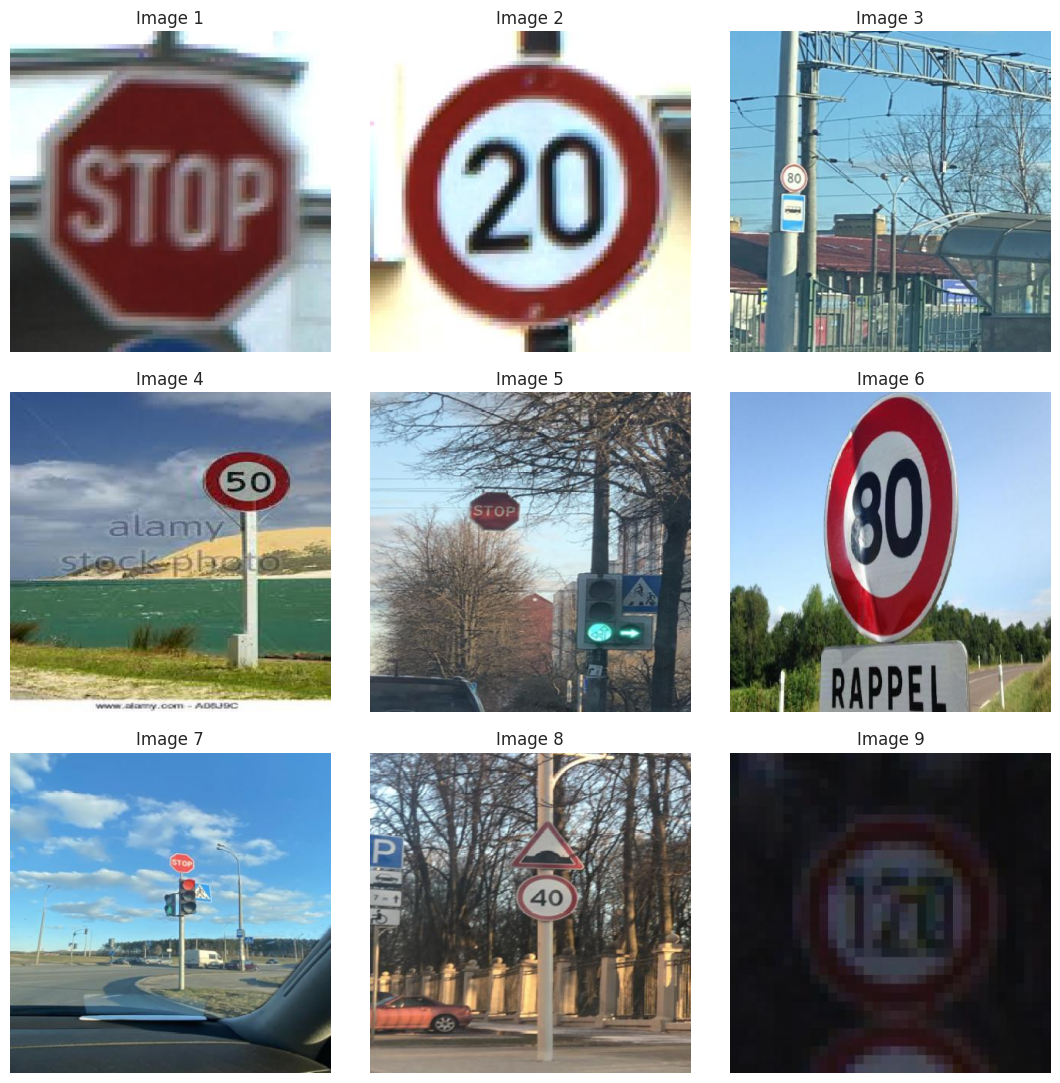

In [ ]:
num_samples = 9
image_files = os.listdir(train_images)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(train_images, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# 3. Training

## 3.1 기존 best model 설정

In [ ]:
# Build from YAML and transfer weights
base_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# 모델 불러오기
# epochs=10,
# imgsz=416,
# batch=32,                 # 배치 크기 32
# lr0=0.0005,              # 학습률 0.0005
# dropout=0.2,             # 드롭아웃 비율 0.2로 변경
# device=0,
# patience=4,
# save_period=1  # 1 에포크마다 체크포인트 저장
model = base_model.load("/content/drive/MyDrive/DL/best.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 412MB/s]

Transferred 355/355 items from pretrained weights


Transferred 319/355 items from pretrained weights


##3.2. 학습시작

###3.2.1. 학습1

In [ ]:
# 추가 학습
Result = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                  # 10 에포크 학습
    imgsz=416,
    batch=128,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률을 낮춤 (0.0005 -> 0.0001)
    dropout=0.2,                # 드롭아웃 비율 유지
    device=0,
    patience=4,
    save_period=1               # 1 에포크마다 체크포인트 저장
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=128, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 82.4MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.63G     0.5322      2.968     0.8656         95        416: 100%|██████████| 28/28 [22:14<00:00, 47.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.21s/it]

                   all        801        944     0.0699      0.704      0.641      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.59G     0.5105       1.23     0.8695         83        416: 100%|██████████| 28/28 [00:45<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.69s/it]

                   all        801        944      0.996      0.564      0.734      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.59G     0.5267      1.077     0.8743         89        416: 100%|██████████| 28/28 [00:46<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  2.00s/it]

                   all        801        944      0.951      0.638      0.824      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.59G     0.5439       1.01     0.8771         87        416: 100%|██████████| 28/28 [00:45<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.21s/it]

                   all        801        944      0.912      0.744      0.848      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       7.6G     0.5278     0.9472     0.8741         87        416: 100%|██████████| 28/28 [00:44<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.75s/it]

                   all        801        944      0.881      0.809      0.877      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.62G     0.5131     0.8924     0.8704         90        416: 100%|██████████| 28/28 [00:45<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.81s/it]

                   all        801        944      0.934      0.814      0.897      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       7.6G     0.4998     0.8295      0.869         86        416: 100%|██████████| 28/28 [00:42<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.30s/it]

                   all        801        944       0.92      0.832      0.895      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.59G     0.4968     0.7787     0.8613         91        416: 100%|██████████| 28/28 [00:42<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.41s/it]


                   all        801        944       0.93      0.847      0.905      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.59G     0.4759     0.7351     0.8613         89        416: 100%|██████████| 28/28 [00:43<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]

                   all        801        944      0.935      0.859      0.915      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.59G     0.4688      0.702     0.8527         77        416: 100%|██████████| 28/28 [00:45<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]

                   all        801        944      0.922      0.869      0.915      0.798



10 epochs completed in 0.518 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.77s/it]


                   all        801        944      0.922      0.869      0.915      0.798
           Green Light         87        122      0.833      0.614       0.74      0.415
             Red Light         74        108      0.835      0.607       0.71       0.45
       Speed Limit 100         52         52      0.961      0.942      0.945      0.862
       Speed Limit 110         17         17      0.697      0.948      0.958      0.887
       Speed Limit 120         60         60      0.983      0.983      0.994      0.905
        Speed Limit 20         56         56      0.996      0.946      0.979      0.851
        Speed Limit 30         71         74      0.942      0.946      0.962      0.913
        Speed Limit 40         53         55      0.957      0.927       0.98      0.875
        Speed Limit 50         68         71      0.969      0.881      0.956      0.836
        Speed Limit 60         76         76      0.957      0.871       0.94       0.86
        Speed Limit 7

###3.2.2. 학습2 : SGD로 변경

In [ ]:
# 추가 학습
Result2 = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                  # 추가로 10 에포크 학습
    imgsz=416,
    batch=128,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률을 낮춤 (0.0005 -> 0.0001)
    dropout=0.2,                # 드롭아웃 비율 유지
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
    optimizer='SGD'
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=128, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.68G     0.4544     0.6818     0.8512         95        416: 100%|██████████| 28/28 [01:24<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]

                   all        801        944      0.934      0.863      0.916      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.62G     0.4362     0.6713      0.848         83        416: 100%|██████████| 28/28 [00:49<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.33s/it]

                   all        801        944      0.935      0.867      0.916        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.61G      0.429     0.6595     0.8451         89        416: 100%|██████████| 28/28 [00:46<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.78s/it]

                   all        801        944      0.937      0.865      0.917        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.61G     0.4284     0.6584     0.8435         87        416: 100%|██████████| 28/28 [00:47<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]

                   all        801        944      0.925      0.885      0.918      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.61G     0.4214     0.6484     0.8408         87        416: 100%|██████████| 28/28 [00:50<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.76s/it]

                   all        801        944      0.925      0.883      0.919      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.64G     0.4166     0.6441     0.8415         90        416: 100%|██████████| 28/28 [00:46<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.36s/it]


                   all        801        944      0.937      0.863      0.918      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.61G     0.4144     0.6393     0.8437         86        416: 100%|██████████| 28/28 [00:45<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.13s/it]


                   all        801        944       0.91      0.888       0.92      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.61G     0.4136     0.6347     0.8385         91        416: 100%|██████████| 28/28 [00:49<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.25s/it]

                   all        801        944      0.923      0.884      0.919      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.61G     0.4083     0.6391     0.8435         89        416: 100%|██████████| 28/28 [00:47<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.27s/it]

                   all        801        944      0.923      0.881       0.92      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.61G     0.4277     0.6462     0.8425         77        416: 100%|██████████| 28/28 [00:44<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.61s/it]


                   all        801        944      0.921      0.885      0.919      0.803

10 epochs completed in 0.187 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.24s/it]


                   all        801        944      0.922      0.881       0.92      0.803
           Green Light         87        122      0.809      0.648      0.751      0.428
             Red Light         74        108      0.869       0.63      0.725      0.458
       Speed Limit 100         52         52      0.946      0.942      0.944      0.862
       Speed Limit 110         17         17      0.711          1      0.969      0.896
       Speed Limit 120         60         60      0.967       0.99      0.993      0.915
        Speed Limit 20         56         56      0.986      0.946      0.979      0.867
        Speed Limit 30         71         74      0.973      0.946       0.97      0.906
        Speed Limit 40         53         55      0.963      0.945      0.983      0.878
        Speed Limit 50         68         71      0.969      0.883      0.958      0.841
        Speed Limit 60         76         76      0.946      0.895       0.94      0.866
        Speed Limit 7

####3.2.2.1. validation

In [ ]:
# 이미지 설정
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

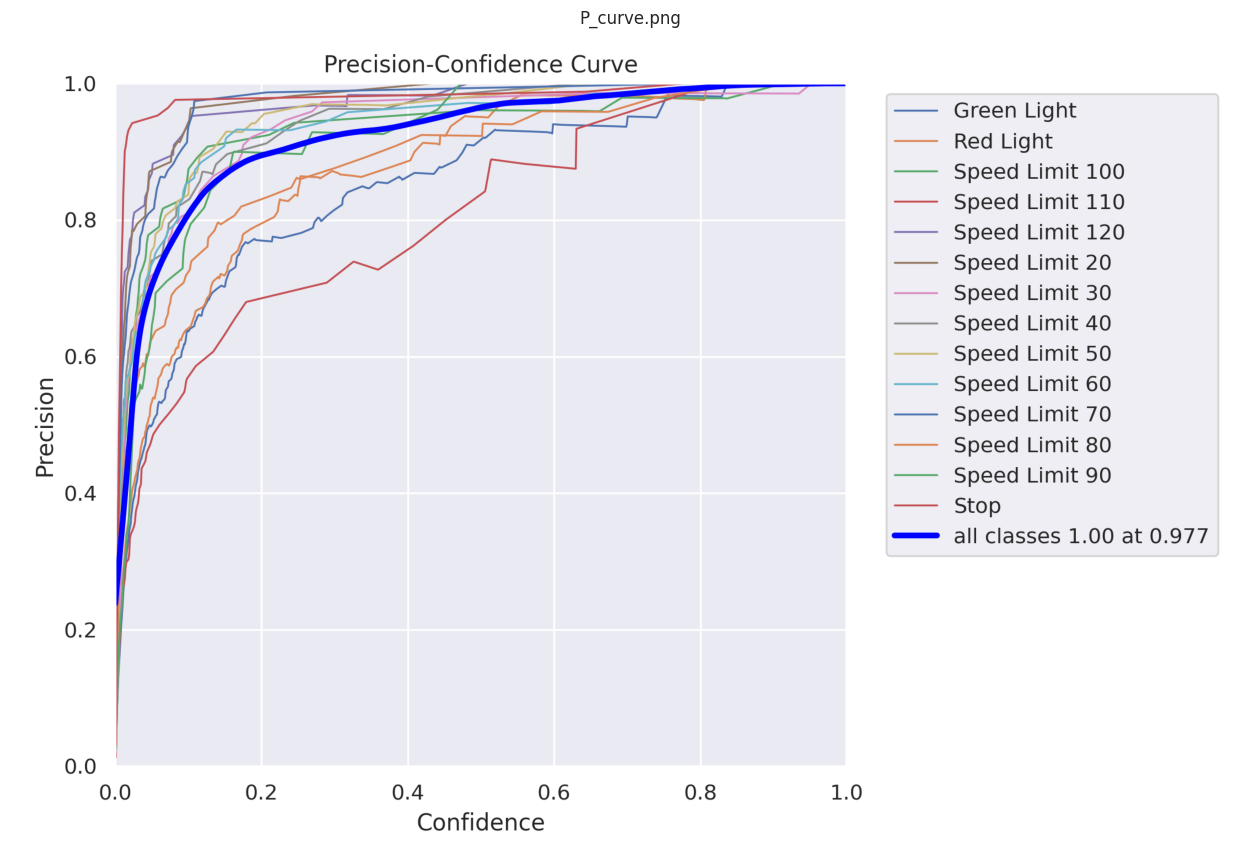

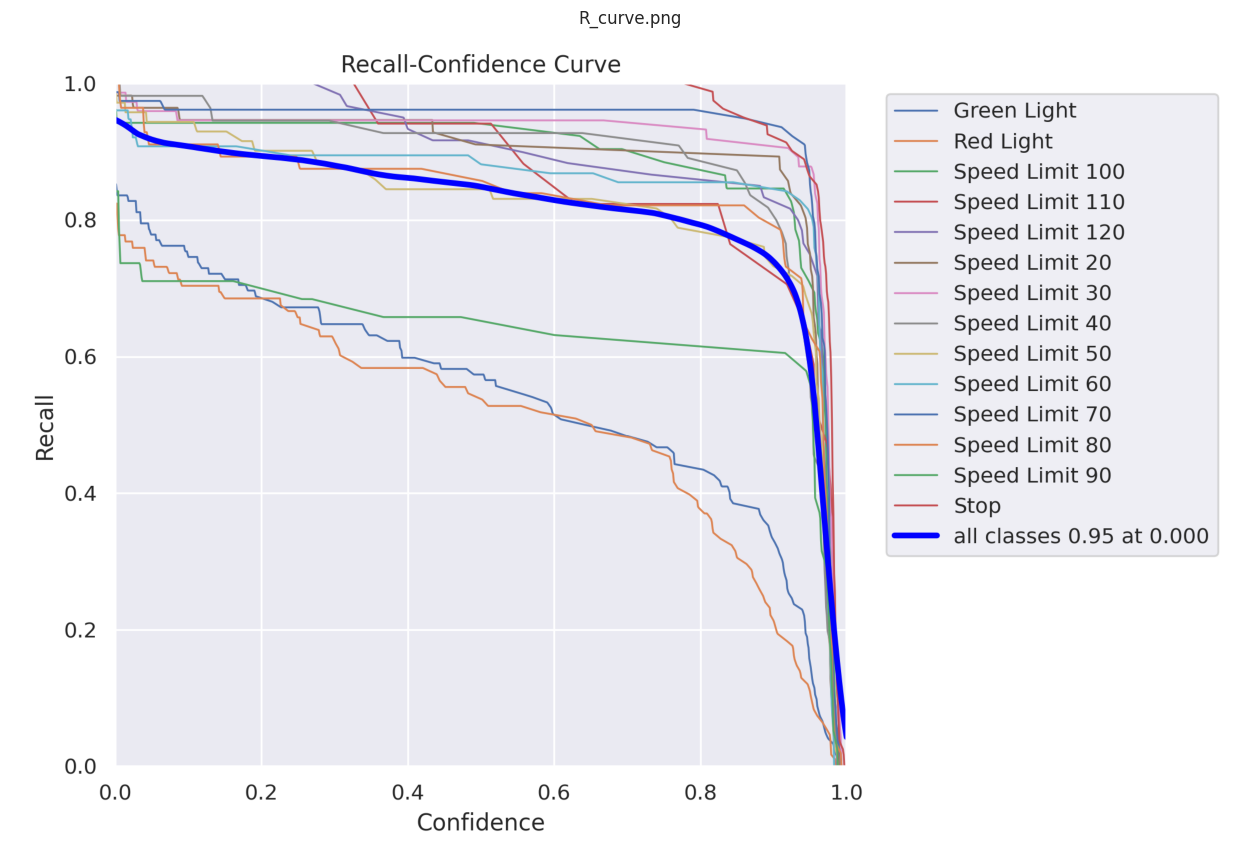

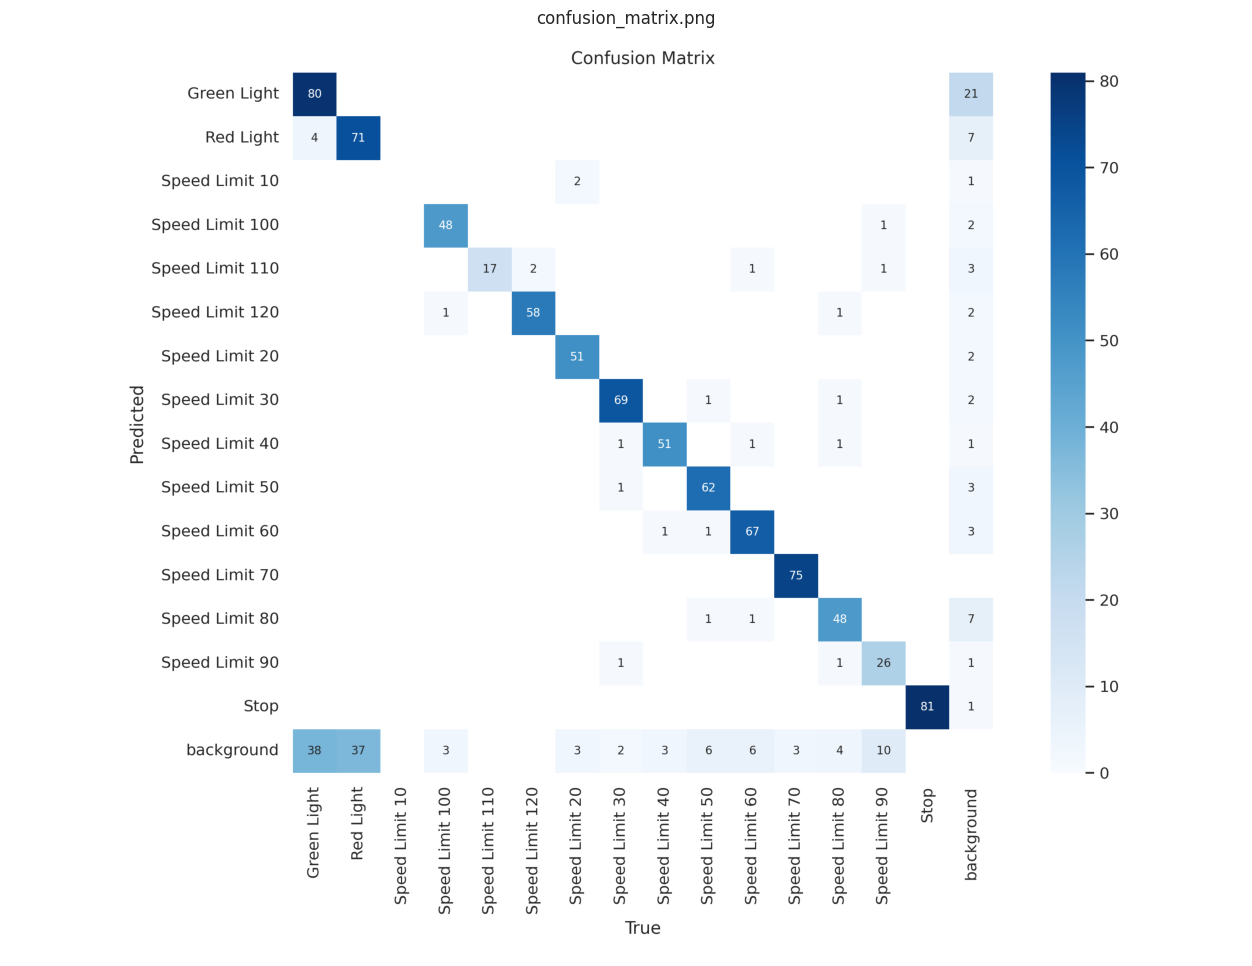

In [ ]:
metrics_base_path = 'runs/detect/train2/'
# Check if each metric file exists
for metric_file in list_of_metrics:
    metric_path = os.path.join(metrics_base_path, metric_file)
    if not os.path.exists(metric_path):
        print(f"File not found: {metric_path}")
        continue

    # Load the image
    image = cv2.imread(metric_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f")Failed to load image: {metric_path}")
        continue

    # Convert BGR (OpenCV default) to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image_rgb)
    plt.title(metric_file)

    # Show the plot
    plt.axis('off')  # Hide axes ticks
    plt.show()



####3.2.2.2. 모델 다운로드

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train2/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##3.3. 새로운 모델 사용
-     epochs=10        
-    imgsz=416
-    batch=128
-    lr0=0.0001
-    dropout=0.2       
-    device=0
-    patience=4
-    save_period=1   
-    optimizer='SGD'

In [ ]:
# Build from YAML and transfer weights
base_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# 모델 불러오기
model = base_model.load("/content/drive/MyDrive/DL/best_a.pt")

Transferred 355/355 items from pretrained weights
Transferred 319/355 items from pretrained weights


##3.4. 새로운 학습 시작

###3.4.1. momentum 0.95로 변경

In [ ]:
Result = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=10,                  # 추가로 10 에포크 학습
    imgsz=416,
    batch=128,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률 0.0001
    dropout=0.2,                # 드롭아웃 비율 0.2
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
    optimizer='SGD',
    momentum=0.95               # 0.937 -> 0.95로 변경
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=10, time=None, patience=4, batch=128, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.95) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.67G     0.4809      3.214     0.8459         95        416: 100%|██████████| 28/28 [01:26<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.44s/it]


                   all        801        944      0.234      0.669      0.708      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.62G     0.4678      2.851     0.8408         83        416: 100%|██████████| 28/28 [00:49<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.57s/it]


                   all        801        944     0.0922      0.687      0.664      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.62G      0.457      2.238     0.8412         89        416: 100%|██████████| 28/28 [00:50<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.58s/it]


                   all        801        944      0.999      0.327      0.718      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.62G     0.4276      1.529     0.8393         87        416: 100%|██████████| 28/28 [00:48<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.71s/it]


                   all        801        944      0.983      0.725      0.819      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.62G     0.4103      1.122     0.8365         87        416: 100%|██████████| 28/28 [00:55<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:14<00:00,  3.52s/it]


                   all        801        944      0.964      0.792      0.846      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.65G     0.4047      1.002     0.8375         90        416: 100%|██████████| 28/28 [00:51<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.30s/it]


                   all        801        944      0.947      0.812      0.865      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.62G     0.4043      0.951     0.8408         86        416: 100%|██████████| 28/28 [00:51<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


                   all        801        944      0.972      0.803      0.879      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.62G     0.4066      0.925     0.8367         91        416: 100%|██████████| 28/28 [00:46<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:21<00:00,  5.28s/it]


                   all        801        944      0.952      0.819      0.884      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.62G     0.4059     0.9201     0.8422         89        416: 100%|██████████| 28/28 [00:50<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.44s/it]


                   all        801        944      0.956      0.822      0.888      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.62G     0.4263     0.9178     0.8408         77        416: 100%|██████████| 28/28 [00:49<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:17<00:00,  4.26s/it]


                   all        801        944      0.957      0.824      0.889      0.785

10 epochs completed in 0.208 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]


                   all        801        944      0.957      0.824      0.889      0.785
           Green Light         87        122      0.917      0.533      0.674      0.405
             Red Light         74        108      0.906      0.593      0.701      0.442
       Speed Limit 100         52         52       0.98      0.937      0.944      0.873
       Speed Limit 110         17         17      0.918      0.882      0.947      0.868
       Speed Limit 120         60         60          1      0.861      0.968      0.896
        Speed Limit 20         56         56      0.988      0.893      0.921      0.835
        Speed Limit 30         71         74      0.955      0.946      0.953        0.9
        Speed Limit 40         53         55      0.971      0.909      0.967      0.862
        Speed Limit 50         68         71      0.967       0.83      0.928      0.827
        Speed Limit 60         76         76      0.956      0.866      0.909      0.842
        Speed Limit 7

####3.4.1.2. validation

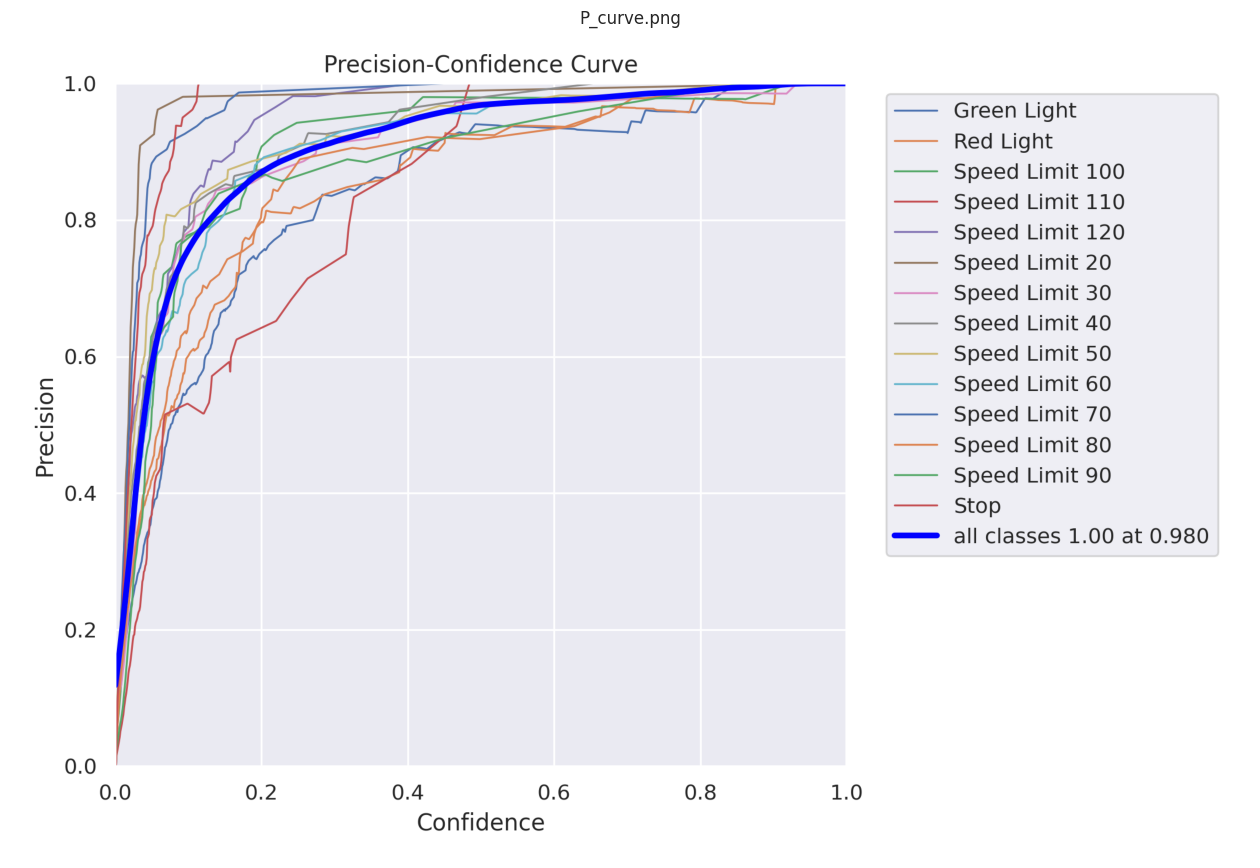

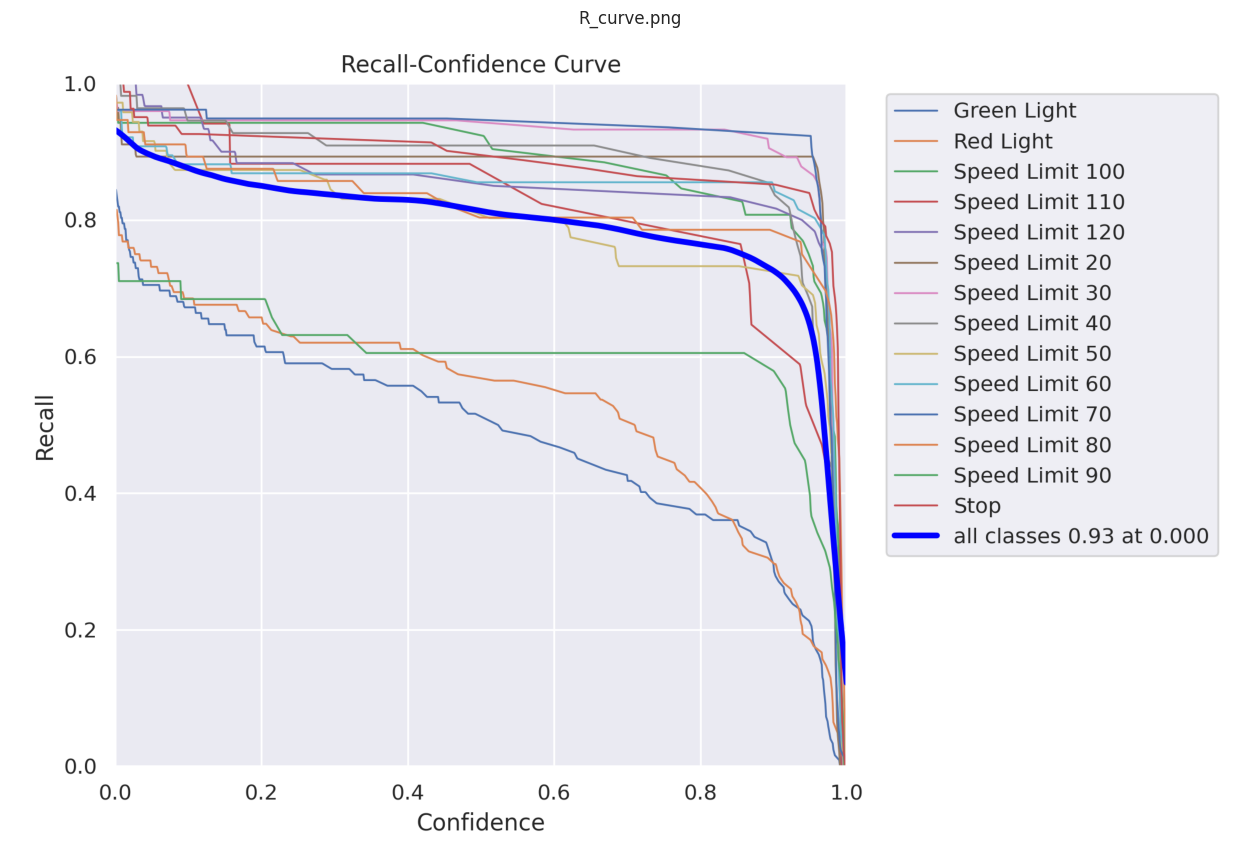

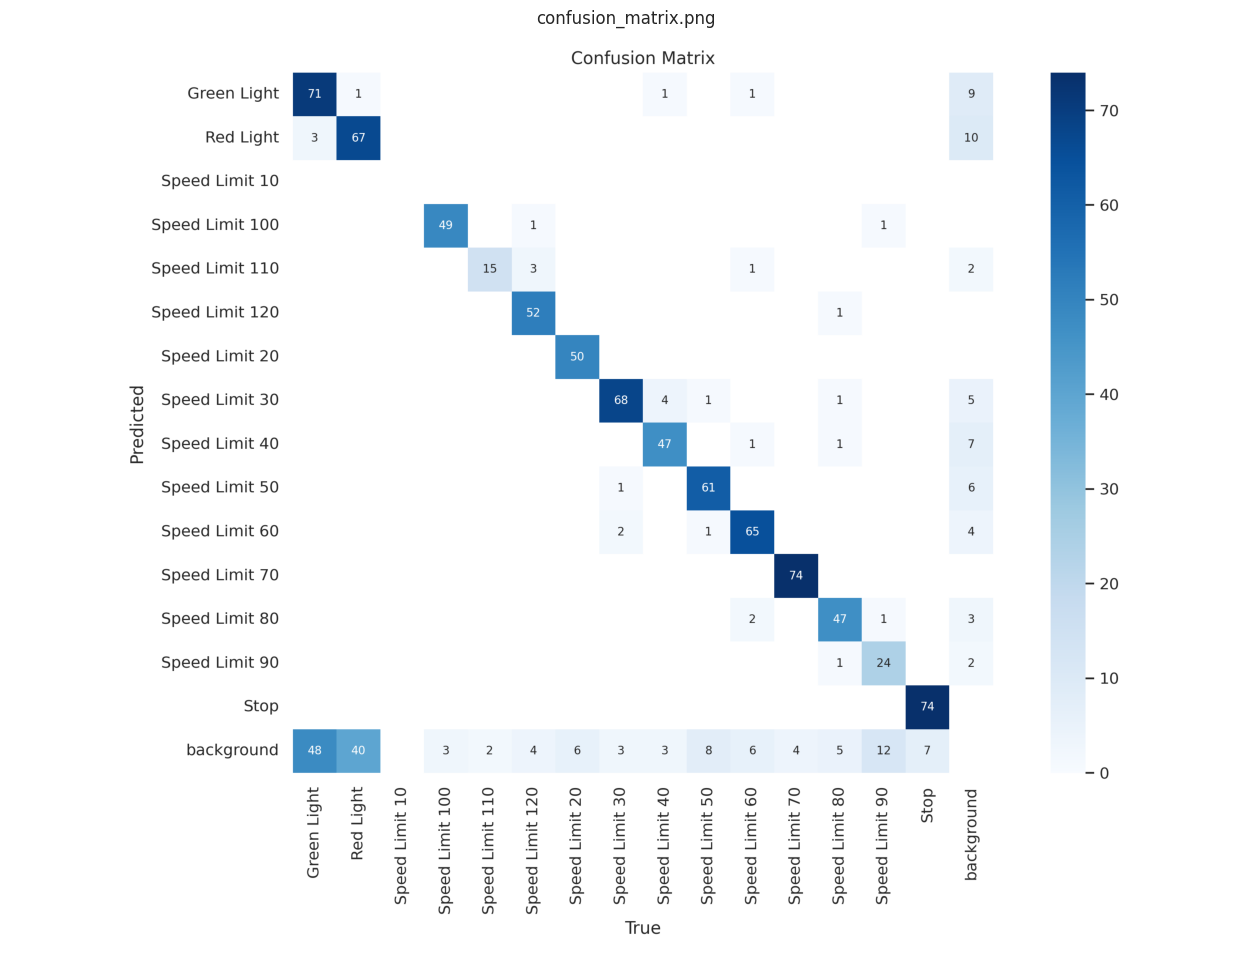

In [ ]:
metrics_base_path = 'runs/detect/train3/'
# Check if each metric file exists
for metric_file in list_of_metrics:
    metric_path = os.path.join(metrics_base_path, metric_file)
    if not os.path.exists(metric_path):
        print(f"File not found: {metric_path}")
        continue

    # Load the image
    image = cv2.imread(metric_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f")Failed to load image: {metric_path}")
        continue

    # Convert BGR (OpenCV default) to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image_rgb)
    plt.title(metric_file)

    # Show the plot
    plt.axis('off')  # Hide axes ticks
    plt.show()



###3.4.2. momentum auto로 변경, 에포크 20

In [ ]:
Result = model.train(
    data="/content/drive/MyDrive/DL/data.yaml",
    epochs=20,                  # 추가로 20 에포크 학습
    imgsz=416,
    batch=128,                   # 배치 크기 128
    lr0=0.0001,                 # 학습률 0.0001
    dropout=0.2,                # 드롭아웃 비율 0.2
    device=0,
    patience=4,
    save_period=1,               # 1 에포크마다 체크포인트 저장
    optimizer='SGD'
)

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/DL/data.yaml, epochs=20, time=None, patience=4, batch=128, imgsz=416, save=True, save_period=1, cache=False, device=0, workers=8, project=None, name=train32, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /content/drive/MyDrive/DL/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/DL/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train32/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.95) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train32
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       7.7G     0.4503     0.9228     0.8512        146        416:  36%|███▌      | 10/28 [00:57<00:47,  2.62s/it]

####3.4.2.2. validation

In [ ]:
metrics_base_path = 'runs/detect/train32/'
# Check if each metric file exists
for metric_file in list_of_metrics:
    metric_path = os.path.join(metrics_base_path, metric_file)
    if not os.path.exists(metric_path):
        print(f"File not found: {metric_path}")
        continue

    # Load the image
    image = cv2.imread(metric_path)

    # Check if the image was successfully loaded
    if image is None:
        print(f")Failed to load image: {metric_path}")
        continue

    # Convert BGR (OpenCV default) to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image_rgb)
    plt.title(metric_file)

    # Show the plot
    plt.axis('off')  # Hide axes ticks
    plt.show()



#4. Test

##4.1. bset model

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

In [ ]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

## 4.2. making prediction

In [ ]:
# Path to the directory containing the images
image_dir = '/kaggle/input/cardetection/car/test/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)

In [ ]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'/kaggle/working/runs/detect/train{i}/image0.jpg'))
    plt.show()